In [3]:
# Importing necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing the dataset
df=pd.read_csv("BlackFridaySales.csv")

In [7]:
# Checking for missing values
df.isnull().sum()

User_ID                           0
Product_ID                        1
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            43078
Product_Category_3            96177
Purchase                          1
dtype: int64

In [8]:
# Handling missing values
df.fillna(df.median(), inplace=True)

<ipython-input-8-d9e4f195f40e>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [13]:
#let's check if there are any values other than 'F' or 'M'
print(df['Gender'].unique())

['F' 'M' nan]


In [15]:
#drop rows where 'Gender' is NaN
df = df.dropna(subset=['Gender'])

In [16]:
# Converting categorical data
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1}).astype(int)
df['Age'] = LabelEncoder().fit_transform(df['Age'])
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)
df['City_Category'] = LabelEncoder().fit_transform(df['City_Category'])

<ipython-input-16-85a733f8e191>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)


In [19]:
# Feature Selection
X = df.drop(['User_ID', 'Purchase','Product_ID'], axis=1)
y = df['Purchase']

In [21]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10.0,0,2,0.0,3.0,9.0,14.0
1,0,0,10.0,0,2,0.0,1.0,6.0,14.0
2,0,0,10.0,0,2,0.0,12.0,9.0,14.0
3,0,0,10.0,0,2,0.0,12.0,14.0,14.0
4,1,6,16.0,2,4,0.0,8.0,9.0,14.0


In [22]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [23]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

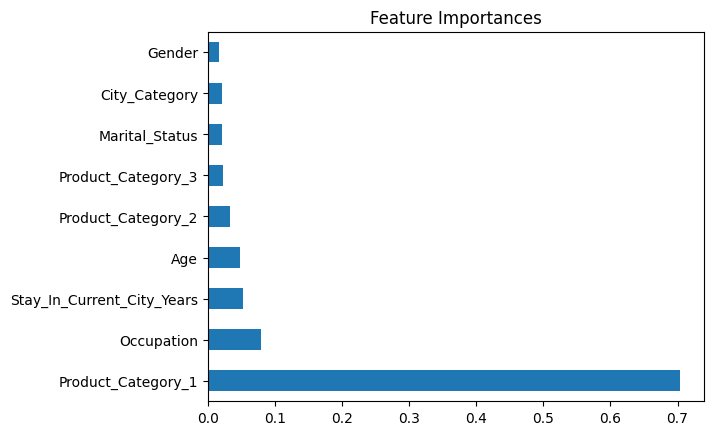

In [24]:
# Visualization
# Visualizing feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [25]:
# Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3175.360476688552


In [26]:
# Prediction function
def predict_purchase(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = input_df.apply(LabelEncoder().fit_transform)
    input_df = scaler.transform(input_df)
    return model.predict(input_df)

In [28]:
#Checking for the accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.591887046254616


In [27]:
# User Input for Prediction
user_input = {
    'Gender': 'M',
    'Age': '26-35',
    'Occupation': 7,
    'City_Category': 'B',
    'Stay_In_Current_City_Years': '2',
    'Marital_Status': 1,
    'Product_Category_1': 3,
    'Product_Category_2': 0,
    'Product_Category_3': 0,
}
predicted_purchase = predict_purchase(user_input)
print(f'Predicted Purchase Amount: {predicted_purchase[0]}')

Predicted Purchase Amount: 13755.803333333335
